In [3]:
import kagglehub

path = kagglehub.dataset_download('dylanjcastillo/7k-books-with-metadata')

print(f'Path to the dataset: {path}')

100%|██████████| 1.47M/1.47M [00:00<00:00, 12.3MB/s]

Extracting files...
Path to the dataset: /Users/sunilthapa/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [5]:
import pandas as pd

df = pd.read_csv(f'{path}/books.csv')

df.head()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [6]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [7]:
# Show missing count for each column
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


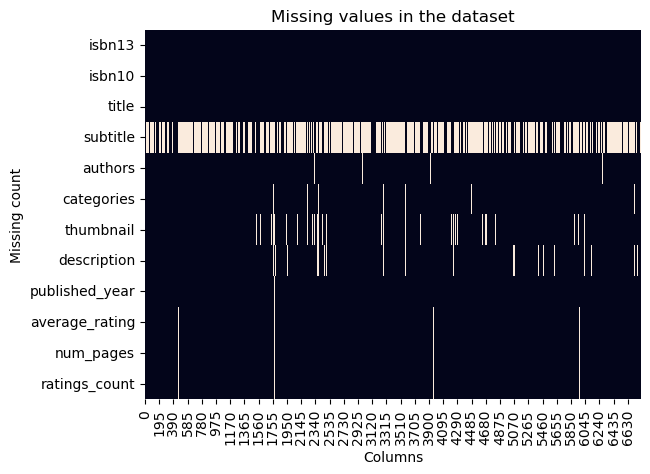

In [9]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)
ax.set_title('Missing values in the dataset')
plt.xlabel('Columns')
plt.ylabel('Missing count')
plt.show()

In [10]:
import numpy as np

df['missing_description'] = np.where(df['description'].isna(), 1, 0)
df['age_of_book'] = 2024 - df['published_year']


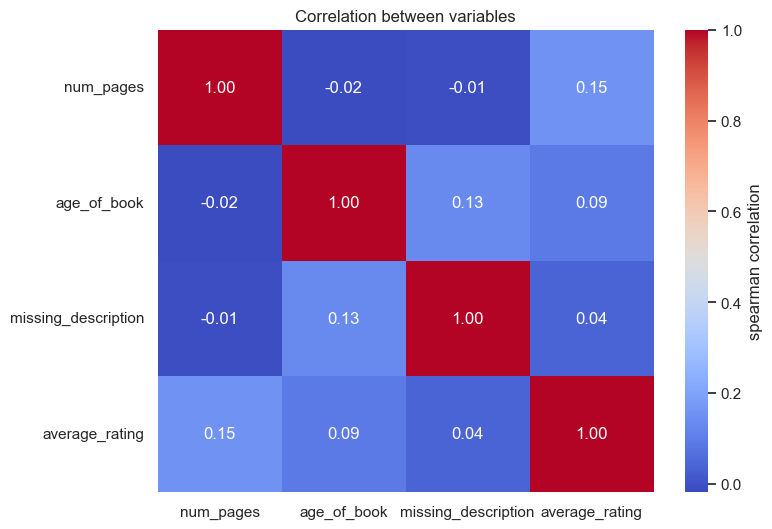

In [13]:
columns_of_interset = ['num_pages', 'age_of_book', 'missing_description', 'average_rating']

correlation = df[columns_of_interset].corr(method='spearman')

sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', 
                      fmt='.2f', cbar_kws={'label': 'spearman correlation'})
heatmap.set_title('Correlation between variables')
plt.show()

In [16]:
book_missing = df[~(df['description'].isna()) & 
    ~(df['num_pages'].isna()) & 
    ~(df['published_year'].isna()) & 
    ~(df['average_rating'].isna())
]

In [18]:
book_missing.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
count,6.507000e+03,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000
mean,9.780668e+12,1998.966498,3.932683,346.071000,2.175727e+04,0.0,25.033502
std,5.868404e+08,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,5.000000
25%,9.780317e+12,1997.000000,3.770000,208.000000,1.750000e+02,0.0,19.000000
50%,9.780552e+12,2002.000000,3.950000,304.000000,1.081000e+03,0.0,22.000000
75%,9.780807e+12,2005.000000,4.130000,418.000000,6.309500e+03,0.0,27.000000
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,148.000000


In [22]:
book_missing['categories'].value_counts().reset_index().sort_values(by='count', ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [23]:
book_missing['words_in_description'] = book_missing['description'].str.split().str.len()

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_14468/2882849729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing['words_in_description'] = book_missing['description'].str.split().str.len()


In [25]:
book_missing.loc[book_missing['words_in_description'].between(1, 4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [26]:
book_missing.loc[book_missing['words_in_description'].between(5, 14), 'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [27]:
book_missing.loc[book_missing['words_in_description'].between(25, 34), 'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [28]:
book_missing_25_words = book_missing[book_missing['words_in_description'] >= 25]
book_missing_25_words.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
count,5.197000e+03,5197.000000,5197.000000,5197.000000,5.197000e+03,5197.0,5197.000000,5197.000000
mean,9.780667e+12,1999.804118,3.922246,348.472195,2.113112e+04,0.0,24.195882,78.774485
std,5.951053e+08,9.082979,0.324975,229.891672,1.446480e+05,0.0,9.082979,68.532750
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,5.000000,25.000000
25%,9.780313e+12,1998.000000,3.750000,213.000000,1.830000e+02,0.0,19.000000,35.000000
50%,9.780521e+12,2002.000000,3.940000,312.000000,1.125000e+03,0.0,22.000000,47.000000
75%,9.780807e+12,2005.000000,4.120000,416.000000,6.574000e+03,0.0,26.000000,105.000000
max,9.789028e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,148.000000,920.000000


In [29]:
book_missing_25_words['titile_subtitle'] = (
    np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'],
             book_missing_25_words[['title', 'subtitle']].astype(str).agg(': '.join, axis=1))
)

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_14468/4291453352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['titile_subtitle'] = (


In [30]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,titile_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [32]:
book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(' '.join, axis=1)

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_14468/1929870202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(' '.join, axis=1)


In [33]:
(
    book_missing_25_words
    .drop(['subtitle', 'missing_description', 'age_of_book', 'words_in_description'], axis=1)
    .to_csv('books_cleaned.csv', index=False)
)